## One-way and two-way ANOVA (Part I)

Recall the following definitions:

- One-way ANOVA: Compares the means of one continuous dependent variable based on three or more groups of one categorical variable.
- Two-way ANOVA: Compares the means of one continuous dependent variable based on three or more groups of two categorical variables.

In [39]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [3]:
diamonts_raw = sns.load_dataset('diamonds', cache=False)
diamonts_raw.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data Cleaning

In [9]:
diamonts_raw['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [13]:
color_count = diamonts_raw['color'].value_counts().reset_index()
color_count['frequency'] = round((color_count['count'] / diamonts_raw.shape[0]) *100,2)

color_count

,color,count,frequency
0,G,11292,20.93
1,E,9797,18.16
2,F,9542,17.69
3,H,8304,15.39
4,D,6775,12.56
5,I,5422,10.05
6,J,2808,5.21


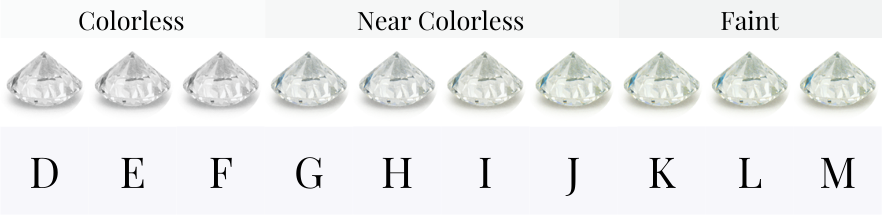

I took a subset of colorless and near colorless diamonds. I excluded G color grade diamonds as there were many more of them, and I excluded J color grade diamonds as there were significantly fewer of them

In [18]:
colorless = diamonts_raw[~diamonts_raw['color'].isin(['G','J'])][['color','price']]
colorless.reset_index(drop=True,inplace=True)
colorless

,color,price
0,E,326
1,E,326
2,E,327
3,I,334
4,I,336
...,...,...
39835,D,2757
39836,D,2757
39837,D,2757
39838,H,2757


In [19]:
colorless['color'].values

['E', 'E', 'E', 'I', 'I', ..., 'D', 'D', 'D', 'H', 'D']
Length: 39840
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [20]:
colorless['color'] = colorless['color'].cat.remove_categories(['G','J'])
colorless['color'].values

['E', 'E', 'E', 'I', 'I', ..., 'D', 'D', 'D', 'H', 'D']
Length: 39840
Categories (5, object): ['D', 'E', 'F', 'H', 'I']

In [21]:
colorless.head()

,color,price
0,E,326
1,E,326
2,E,327
3,I,334
4,I,336


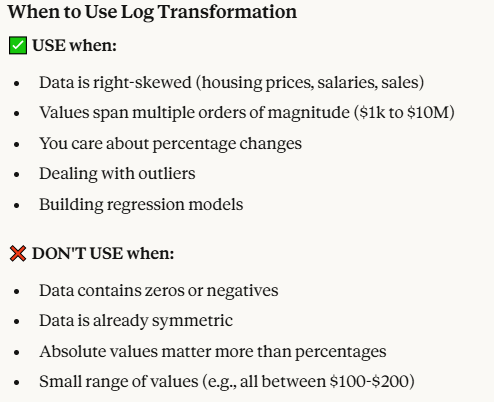

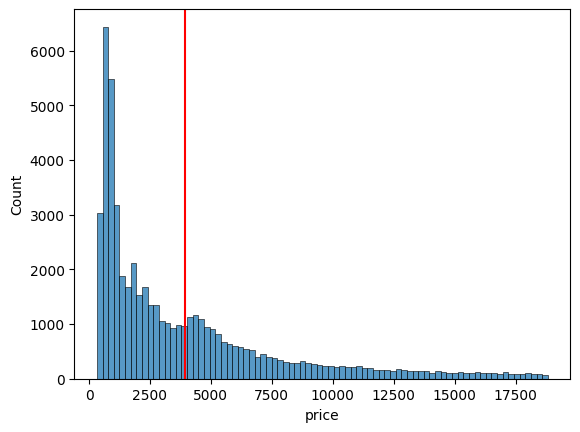

In [41]:
sns.histplot(diamonts_raw['price'])

plt.axvline(diamonts_raw['price'].mean(), color = 'red')

In [27]:
colorless['log_price'] = colorless.apply( lambda row: round(math.log(row['price']),3), axis = 1)
colorless

,color,price,log_price
0,E,326,5.787
1,E,326,5.787
2,E,327,5.790
3,I,334,5.811
4,I,336,5.817
...,...,...,...
39835,D,2757,7.922
39836,D,2757,7.922
39837,D,2757,7.922
39838,H,2757,7.922


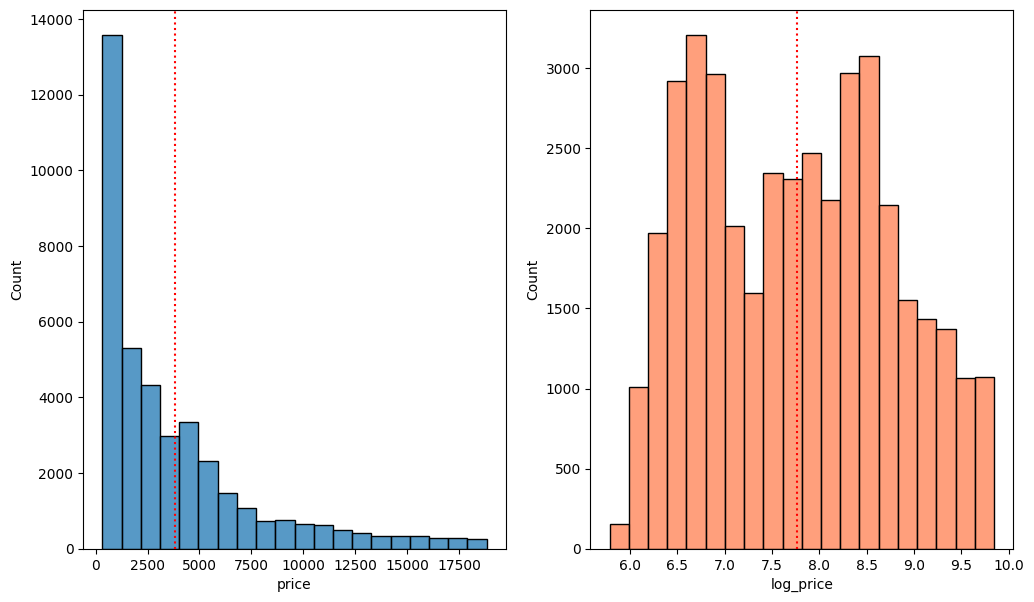

In [46]:
fig, axes = plt.subplots(1,2,figsize= (12,7))

sns.histplot(
    colorless['price'],
    ax= axes[0],
    bins= 20
)

sns.histplot(
    colorless['log_price'],
    ax= axes[1],
    color='coral',
    bins = 20
)

axes[0].axvline(colorless['price'].mean(),color='red',ls=':')
axes[1].axvline(colorless['log_price'].mean(),color='red',ls=':')

In [ ]:
# Save the new clean data
colorless.to_csv('./raw_data/diamonts_clean.csv',index=False,header=list(colorless.columns))

## One-way ANOVA

In [30]:
diamonts = pd.read_csv('./raw_data/diamonts_clean.csv')
diamonts.head()

,color,price,log_price
0,E,326,5.787
1,E,326,5.787
2,E,327,5.790
3,I,334,5.811
4,I,336,5.817


one-way ANOVA helps to better understand the relationship between a categorical variable and a continuous variable